In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis")

from artifical_data import reaction1_synthetic_data
from monte_carlo_estimator import monte_carlo_parameter_estimation
from plotter import print_monte_carlo_info, corner_plot_monte_carlo_results, correlation_matrix_plot
from data_handler import save_results
from noise_function_libary import no_noise, add_noise_plate_reader, add_noise_processed_data
import os
import pandas as pd

In [2]:
# experimental data
EXPERIMENTAL_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\experimental_data"

# processed data
PROCESSED_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\processed_data"

# results path
RESULTS_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\results"

In [3]:
 # define model
    
parameters = ['Vmax', 'Km1', 'Km2']
substrates = ["PD_mM", "NAD_mM"]

def michaelis_menten(S, *parameters):
    S1, S2 = S
    Vmax, Km1, Km2 = parameters

    return (Vmax * S1 * S2) / ((Km1 + S1) * (Km2 + S2))

In [4]:
true_parameters = (100, 2, 3)  # Vmax, Km1, Km2
synthetic_data_r1 = reaction1_synthetic_data(true_parameters)
synthetic_data_r1.to_csv(os.path.join(PROCESSED_DATA_PATH, "synthetic_reaction1_data.csv"), index=False)

# Perform Monte Carlo parameter estimation
initial_guess = [80, 1, 1]
cal_parameters = {}

monte_carlo_results_r1 = monte_carlo_parameter_estimation(synthetic_data_r1, None, substrates, cal_parameters,
                                                            michaelis_menten, no_noise, 
                                                            initial_guess, noise_level=0.01, num_iterations=500)

# Save results
mc_results = save_results(monte_carlo_results_r1, parameters, save_path=os.path.join(RESULTS_PATH, "artificial_reaction1_results.csv"))

In [5]:
monte_carlo_results_r1_nosiy = monte_carlo_parameter_estimation(synthetic_data_r1, None, 
                                                              substrates, cal_parameters, 
                                                              michaelis_menten, add_noise_processed_data,
                                                              initial_guess=initial_guess, noise_level=0.01, num_iterations=500)
    
    # Save noisy results
mc_results_noisy = save_results(monte_carlo_results_r1_nosiy, parameters, save_path=os.path.join(RESULTS_PATH, "artificial_reaction1_noisy_results.csv"))

In [6]:
 # Perform Monte Carlo parameter estimation with experimental data

data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "Reaction1", "r_1_PD_NAD.csv"))
cal_data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "NADH_Kalibriergerade.csv"))

cal_parameters = {
    "Vf_well": 10.0,  # mL
    "Vf_prod": 1.0,  # mL
    "c_prod": 2.2108    # mg/mL
}

initial_guess = [80, 1, 1]
noise_level = 0.01
num_iterations = 500

mc_reaction1_noisy_plate_reader = monte_carlo_parameter_estimation(data, 
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten, add_noise_plate_reader, 
                                                            initial_guess, noise_level, num_iterations)


df_reaction1_noisy_plate_reader = save_results(mc_reaction1_noisy_plate_reader, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction1_noisy_plate_reader_results.csv"))

In [8]:
# Perform Monte Carlo parameter estimation with experimental data

data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "Reaction1", "r_1_PD_NAD.csv"))
cal_data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "NADH_Kalibriergerade.csv"))
cal_parameters = {
    "Vf_well": 10.0,  # mL
    "Vf_prod": 1.0,  # mL
    "c_prod": 2.2108    # mg/mL
}

initial_guess = [80, 1, 1]
noise_level = 0.01
num_iterations = 500

mc_reaction1_noisy_plate_reader = monte_carlo_parameter_estimation(data,
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten, add_noise_plate_reader,
                                                            initial_guess, noise_level, num_iterations)


df_reaction1_noisy_plate_reader = save_results(mc_reaction1_noisy_plate_reader, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction1_noisy_plate_reader_results.csv"))

Monte Carlo Parameter Estimation Results:

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2']
 ['Vmax' 1.0 0.4639413916421059 0.8813593392243724]
 ['Km1' 0.4639413916421059 1.0 0.06565577696151197]
 ['Km2' 0.8813593392243724 0.06565577696151197 1.0]]


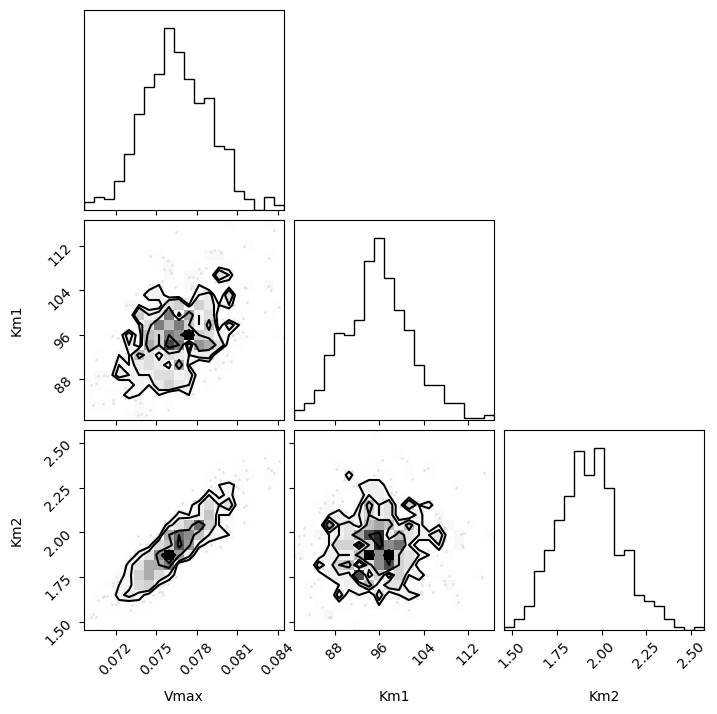

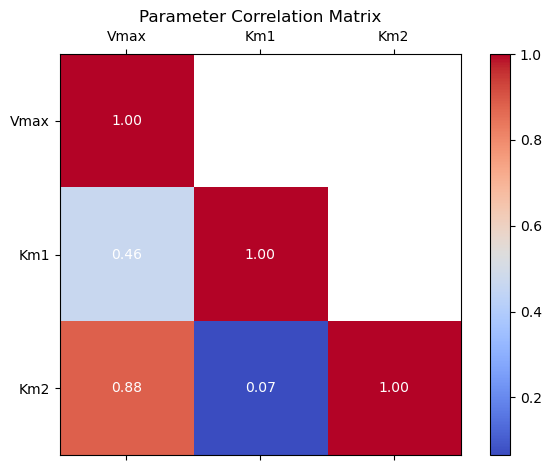

In [9]:
print_monte_carlo_info(parameters, df_reaction1_noisy_plate_reader)

corner_plot_monte_carlo_results(df_reaction1_noisy_plate_reader,parameters)
correlation_matrix_plot(df_reaction1_noisy_plate_reader,parameters)